### Benchmark of the different implementations of singly linked list

In [4]:
from __future__ import print_function

import gc
import numpy as np
import math
from time import time

import matplotlib.pyplot as plt

import Q2_variant_1
import Q2_variant_2
import Q2_variant_3

In [5]:
big_list_size   = 4 * 10**6  # Size of all iterables here: beware of lack of RAM
level_of_detail = 16         # More level of detail => more points on curves will be calculated
times_repeat    = 32         # More times repeating calculation => less stochastic result

In [6]:
# Let's make a big iterable
big_list = [i for i in range(big_list_size)]
print("big list is constructed")

linked_lists = []
linked_lists.append(Q2_variant_1.from_iterable(big_list))
linked_lists.append(Q2_variant_2.from_iterable(big_list))
linked_lists.append(Q2_variant_3.from_iterable(big_list))
print("linked lists are constructed")

func_k = []
func_k.append(Q2_variant_1.return_k_th_from_end_element)
func_k.append(Q2_variant_2.return_k_th_from_end_element)
func_k.append(Q2_variant_3.return_k_th_from_end_element)

big list is constructed
linked lists are constructed


In [7]:
k_exp = [int(10 ** (n / level_of_detail) - 1) \
         for n in range(level_of_detail * int(math.log10(big_list_size)) + 1)]
print("There will be", len(k_exp), "points for each curve")

There will be 97 points for each curve


In [8]:
T1 = time()
exec_times = []

for i in range(3):
    exec_times.append([])
    for k in k_exp:
        current_times = []
        for t in range(times_repeat):
            gc.collect()
            t1 = time()
            func_k[i](k, linked_lists[i])
            t2 = time()
            current_times.append(t2 - t1)
        exec_times[-1].append(np.mean(current_times))
        print(".", end=" ")
    print()
T2 = time()

print("total time", (T2 - T1) // 60, "minutes")

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
total time 629.0 minutes


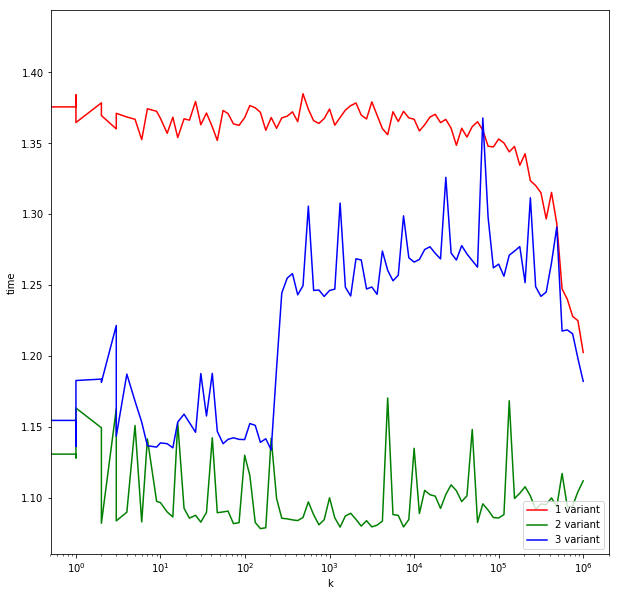

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(k_exp, exec_times[0], color='r', label='1 variant')
plt.plot(k_exp, exec_times[1], color='g', label='2 variant')
plt.plot(k_exp, exec_times[2], color='b', label='3 variant')
plt.xscale('log')
plt.ylabel('time')
plt.xlabel('k')
plt.legend(loc="lower right")
plt.show()

**Clarification:**

- 1 variant - singly linked list with 2 consequent walking-through (with using length of list)
- 2 variant - singly linked list with using deque as a storage of intermediate nodes
- 3 variant - singly linked list with two pointers: current node and k_th_back node

We calculate speed each time for the same n (big_list_size), but different k. Less time => quicker implementation